### Coins Model

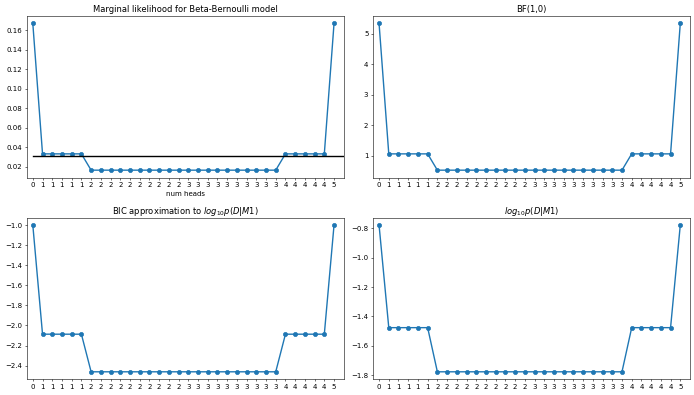

In [8]:
import numpy as np
from scipy.special import betaln
import matplotlib.pyplot as plt

theta = 0.7
n = 5
alpha = 1
alpha_heads = alpha
alpha_tails = alpha

flips = np.zeros((2**n, n))
n_heads = np.zeros(2**n)
n_tails = np.zeros(2**n)
marginal_likelihood = np.zeros(2**n)
log_likelihood = np.zeros(2**n)
log_bf = np.zeros(2**n)

for i in range(0, 2**n):
    flips[i] = np.array(np.unravel_index(i, [2] * n, "F")) + 1
    n_heads[i] = len(np.where(flips[i] == 1)[0])
    n_tails[i] = len(np.where(flips[i] == 2)[0])
    marginal_likelihood[i] = np.exp(betaln(alpha_heads + n_heads[i], alpha_tails + n_tails[i]) - betaln(alpha_heads, alpha_tails))
    mle = n_heads[i] / n
    log_likelihood[i] = n_heads[i] * np.log10(mle + 10e-8) + n_tails[i] * np.log10(1 - mle + 10e-8)
    log_bf[i] = betaln(alpha_heads + n_heads[i], alpha_tails + n_tails[i]) - betaln(alpha_heads, alpha_heads) - n * np.log(0.5)

''' sort in order of number of heads '''
ndx = np.argsort(n_heads)
n_heads = n_heads[ndx]
marginal_likelihood = marginal_likelihood[ndx]
log_likelihood = log_likelihood[ndx]
log_bf = log_bf[ndx]


fig, axes = plt.subplots(2, 2, figsize=(14, 8), dpi=50)

p0 = (1 / 2) ** n

''' Marginal Likelihood '''
axes[0, 0].plot(marginal_likelihood, "o-", linewidth=2)
axes[0, 0].plot((0, 2**n), (p0, p0), c="k", linewidth=2)
axes[0, 0].set_xticks(list(range(len(n_heads))))
axes[0, 0].set_xticklabels(n_heads.astype(int))
axes[0, 0].set_xlabel("num heads")
axes[0, 0].set_title(r"Marginal likelihood for Beta-Bernoulli model")
axes[0, 0].set_xlim((-0.6, 2**n))

''' BF(1,0) '''
axes[0, 1].plot(np.exp(log_bf), "o-", linewidth=2)
axes[0, 1].set_title("BF(1,0)")
axes[0, 1].set_xticks(list(range(len(n_heads))))
axes[0, 1].set_xticklabels(n_heads.astype(int))
axes[0, 1].set_xlim((-0.6, 2**n))

''' BIC approximation '''
BIC1 = log_likelihood - 1
axes[1, 0].plot(BIC1, "o-", linewidth=2)
axes[1, 0].set_title(r"BIC approximation to $log_{10} p(D|M1)$")
axes[1, 0].set_xticks(list(range(len(n_heads))))
axes[1, 0].set_xticklabels(n_heads.astype(int))
axes[1, 0].set_xlim((-0.6, 2**n))

''' Log10 p(D|M1) '''
axes[1, 1].plot(np.log10(marginal_likelihood), "o-", linewidth=2)
axes[1, 1].set_title(r"$log_{10} p(D | M1)$")
axes[1, 1].set_xticks(list(range(len(n_heads))))
axes[1, 1].set_xticklabels(n_heads.astype(int))
axes[1, 1].set_xlim((-0.6, 2**n))

plt.tight_layout()
plt.show()